In [2]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [4]:
faces=datasets.fetch_olivetti_faces()
data=faces.data
image = faces.images

In [5]:
data.shape

(400, 4096)

In [6]:
image.shape

(400, 64, 64)

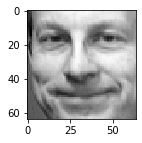

In [8]:
plt.figure(figsize=(3,2))
plt.imshow(image[123],cmap='gray')

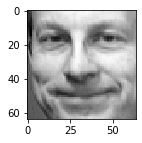

In [9]:
plt.figure(figsize=(3,2))
plt.imshow(data[123].reshape(64,64),cmap='gray')

In [12]:
target = faces.target
train=data[target<30]
test=data[target>=30]

In [13]:
x_train=train[:,:2048]
y_train=train[:,2048:]

In [14]:
x_test=test[:,:2048]
y_test=test[:,2048:]

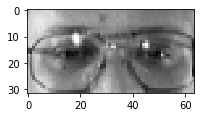

In [15]:
plt.figure(figsize=(3,2))
plt.imshow(x_test[4].reshape(32,64),cmap='gray')

In [18]:
Estimator={'knn':KNeighborsRegressor(),'LR':LinearRegression(),'Ridge':Ridge()
          ,'et':ExtraTreesRegressor()}

In [19]:
y_predict=dict()
for key,estimator in Estimator.items():
    estimator.fit(x_train,y_train)
    y_new=estimator.predict(x_test)
    y_predict[key]=y_new


/home/carbon13/miniconda2/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [20]:
y_predict

{'knn': array([[0.42561984, 0.39504132, 0.38264462, ..., 0.3818182 , 0.43305787,
         0.41487604],
        [0.585124  , 0.58842975, 0.6041322 , ..., 0.43223143, 0.43471074,
         0.39173552],
        [0.5834711 , 0.583471  , 0.6       , ..., 0.42809916, 0.44958678,
         0.45702475],
        ...,
        [0.5363637 , 0.55785125, 0.57024795, ..., 0.3338843 , 0.32066116,
         0.32066116],
        [0.40330577, 0.3636364 , 0.3553719 , ..., 0.45867768, 0.4561983 ,
         0.4528926 ],
        [0.45371905, 0.51652896, 0.55289257, ..., 0.40413222, 0.36942148,
         0.37107438]], dtype=float32),
 'LR': array([[0.27893955, 0.2752822 , 0.34122676, ..., 0.48892498, 0.40651757,
         0.40238136],
        [0.74319875, 0.78342694, 0.78544414, ..., 0.5254948 , 0.41257828,
         0.28225678],
        [0.67753845, 0.79952747, 0.76996046, ..., 0.47613877, 0.47932726,
         0.26784277],
        ...,
        [0.50796986, 0.41916102, 0.45761326, ..., 0.3128549 , 0.35766315,
      

In [55]:
knn_predict=y_predict['knn']
lr_predict=y_predict['LR']
ridge_predict=y_predict['Ridge']
tree_predict=y_predict['et']


In [32]:
x_test.shape

(100, 2048)

In [31]:
knn_predict.shape

(100, 2048)

In [56]:
knn_predict=np.hstack((x_test,knn_predict))
lr_predict=np.hstack((x_test,lr_predict))
ridge_predict=np.hstack((x_test,ridge_predict))
tree_predict=np.hstack((x_test,tree_predict))


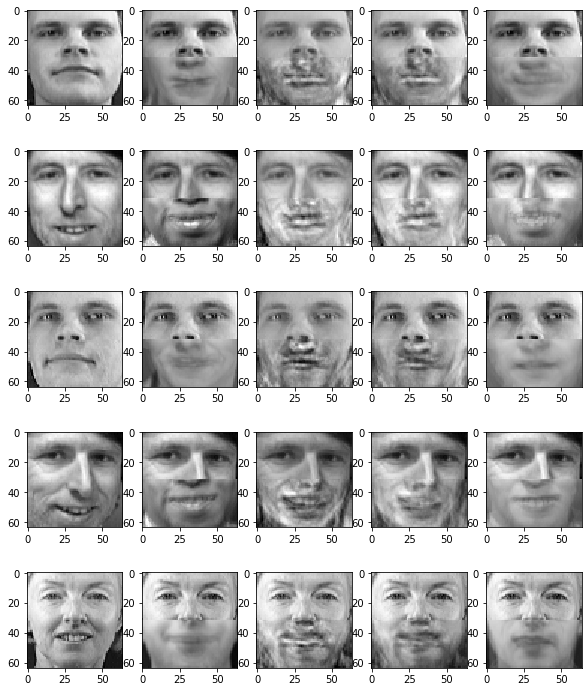

In [66]:
plt.figure(figsize=(6*2,5*2.5))
randintt = np.random.randint(0,100,size=5)
for i in range(5):
    axes1=plt.subplot(5,6,i*6+1)
    axes1.imshow(test[randintt[i]].reshape((64,64)),cmap='gray')
    axes2=plt.subplot(5,6,i*6+2)
    axes2.imshow(knn_predict[randintt[i]].reshape((64,64)),cmap='gray')
    axes3=plt.subplot(5,6,i*6+3)
    axes3.imshow(lr_predict[randintt[i]].reshape((64,64)),cmap='gray')
    axes4=plt.subplot(5,6,i*6+4)
    axes4.imshow(ridge_predict[randintt[i]].reshape((64,64)),cmap='gray')
    axes5=plt.subplot(5,6,i*6+5)
    axes5.imshow(tree_predict[randintt[i]].reshape((64,64)),cmap='gray')
plt.show()

In [57]:
knn_predict.shape

(100, 4096)